<a href="https://colab.research.google.com/github/BMugo84/pytorch_in_25_hours/blob/main/pytorch02Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Introduction to Machine Learning Classification**


**Binary Classification**
*Used to differentiate one thing from another, i.e., distinguishing between two classes. For example, classifying images as either dogs or cats.*

**Multiclass Classification**
*Involves more than two classes. For instance, classifying images into multiple categories such as pizza, sausages, or pies. Each class represents a different label.*

**Multilabel Classification**
*Involves assigning multiple labels to a single sample. For example, an image could be labeled as both 'cat' and 'black' if it contains a black cat.*

## 2. **Classification Input and Outputs**


**Resizing the Image**
*We first start by resizing the image into a square form, meaning height equals width.*

**Converting Image to Tensors**
*Next, we take the resized image (with its height, width, and color scheme) and convert these values into a tensor, which is essentially an array of important values.*

**Feeding Tensors to the Algorithm**
*We then send these tensors to the machine learning algorithm to get the output. The output is a series of tensors, which the computer uses to understand the patterns.*

**Interpreting the Output**
*The output tells us which pattern the algorithm matched the image to, providing us with the classification result.*

**Important Notes**
- **Image Size:** `[batch size, color channels, height, width]`
    - **Batch Size:** The number of images the CPU/GPU will process at a time.
    - **Color Channels:** The color information, typically red-green-blue (RGB).
    - **Height and Width:** The dimensions of the image.


## 3. **Architecture of a Classification Neural Network**




### Understanding the Model Setup for Image Classification

When dealing with an image, the input size is typically represented as \([3, height, width]\), where:
- `3` stands for the color channels (Red, Green, Blue).
- `height` and `width` represent the dimensions of the image.

#### Setting Up the Model
To input this image into a neural network model, you need to use linear layers, which are defined as `nn.Linear(in_features, out_features)`.

1. **First Hidden Layer**:
   ```python
   nn.Linear(in_features=3, out_features=100)
   ```
   Here, `3` is the number of input features (color channels), and `100` is the number of neurons in the hidden layer.

2. **Second Hidden Layer**:
   ```python
   nn.Linear(in_features=100, out_features=100)
   ```
   This layer takes the `100` neurons from the first hidden layer as input and has `100` neurons as output.

   Thus, we have two hidden layers, each with `100` neurons.

3. **ReLU Activation Function**:
   ```python
   nn.ReLU()
   ```
   The ReLU (Rectified Linear Unit) activation function is used to introduce non-linearity. If the input is negative, it outputs `0`; otherwise, it outputs the positive value. This is also known as the ramp function.

4. **Third Hidden Layer (Output Layer)**:
   ```python
   nn.Linear(in_features=100, out_features=3)
   ```
   This layer takes the `100` neurons from the previous layer and outputs a tensor representing the image pattern (or classification result).

#### Setting Up the Loss Function and Optimizer
1. **Loss Function**:
   ```python
   loss_fn = torch.nn.CrossEntropyLoss()
   ```
   The cross-entropy loss function is commonly used for classification tasks.

2. **Optimizer**:
   ```python
   optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
   ```
   The optimizer, Stochastic Gradient Descent (SGD), updates the model parameters to minimize the loss. The learning rate (`lr`) is set to `0.001`.


*italicized text*## 4. ****


## 5. **Turning Our Data into Tensors**


In [53]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

- The `x` values each sample (row) consists of two values: the x-coordinate and the y-coordinate
- `Label 0`: Represents points that belong to the outer circle.
- `Label 1`: Represents points that belong to the inner circle.


In [54]:
# make dataframe of data and labels
import pandas as pd
circles = pd.DataFrame({"x0":X[:, 0],
                        "x1":X[:, 1],
                        "label":y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


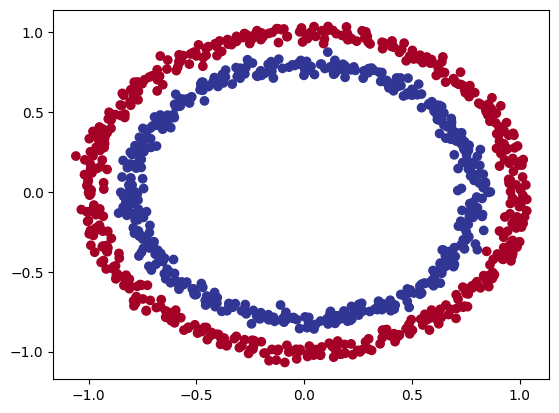

In [55]:
# visualize the plots on a scatter graph
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### 5.1 check input and output shapes

In [56]:
# view shape of the inputs
X.shape, y.shape

((1000, 2), (1000,))

In [57]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [58]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [59]:
# view first  samples of x and y
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

(array([0.75424625, 0.23148074]), 1)

`X`: The coordinates are [0.75424625, 0.23148074], which makes X a 2-dimensional array.
`y`: The label is 1, which is a scalar.


### 5.2 Turn data into tensors and create train and test splits

In [60]:
# change data into tensors ?
import torch

In [61]:
# find the type of the data
type(X), type(y), X.dtype, y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [62]:
# convert ndarray of type float64 to tensor using from_numpy and of the format
# float32
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [63]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,      #test data percentage
                                                    random_state=42)

In [64]:
# check len of xtrain and test
len(X_train), len(X_test)

(800, 200)

## 6. **Build a model**


1. setting up device agnostic code ie code that can learn on accelerated devices
1. construct a model by subcalssing nn.module
1. define a loss function and optimizer
1. build a training and testing loop

### 6.1 device agnostic code

In [65]:
# import pytorch and nn
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6.2 **Constructing a Model in PyTorch**



1. **Subclassing `nn.Module`**:
    - Create a class that inherits from `nn.Module`.

2. **Creating Layers**:
    - Define two `nn.Linear` layers in the `__init__` method:
        - The first layer should handle the input shape of our data.
        - The second layer should handle the output shape.

3. **Defining the Forward Method**:
    - Outline the forward pass through the model in the `forward` method.

4. **Instantiating the Model**:
    - Create an instance of the model class.

5. **Sending the Model to the Target Device**:
    - Check for GPU availability and send the model to the target device (GPU or CPU).


In [66]:
# 1. construct a model that subclasses nn.module
class CirclemodelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # 2. create 2 nn.linear layers capable of handling the input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=8)         # takes in 2 feautures ie x[0] and x[1] and returns 8 samples
        self.layer_2 = nn.Linear(in_features=8, out_features=1)       # takes in 8 feautures from prev layer and outputs 1 sample ie the models prediction of X ie to match y

    # 3. define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))    # x -> layer_1 -> layer_2 -> output

# 4. instantiate an instance of our model and send it to the target device
model_0 = CirclemodelV0().to(device)
model_0, next(model_0.parameters()).device



(CirclemodelV0(
   (layer_1): Linear(in_features=2, out_features=8, bias=True)
   (layer_2): Linear(in_features=8, out_features=1, bias=True)
 ),
 device(type='cpu'))

![picture](https://github.com/BMugo84/pytorch_in_25_hours/blob/main/circle_linear_model_visualized.png?raw=True)


Instead of writing the whole neural network using classes, we can use `nn.Sequential` for simpler operations. `nn.Sequential` allows us to stack layers in a sequence. For more complex functions, using classes is recommended.

In [67]:
# lets replicate the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [68]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591]])),
             ('0.bias',
              tensor([-0.4310, -0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218,  0.1083]])),
             ('1.bias', tensor([-0.0737]))])


**Interpretation**

- **Layer 0**:
  - **Weights**: The first `nn.Linear` layer has 8 neurons, each taking 2 input features. The weights determine how each input feature influences the neuron's activation.
  - **Biases**: Each of the 8 neurons has a bias that shifts the neuron's activation.

- **Layer 1**:
  - **Weights**: The second `nn.Linear` layer has 1 neuron, taking 8 input features (outputs from the previous layer). The weights determine how each of these 8 features influences the single neuron's activation.
  - **Bias**: The single output neuron has a bias that shifts its activation.


### 6.3 Creating a loss optimization function



**Which loss function should we use?**

This is problem-specific. Here's a table to show the use cases:

| Loss Function/Optimizer               | Problem Type                  | PyTorch Code                              |
|---------------------------------------|-------------------------------|-------------------------------------------|
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | `torch.optim.SGD()`                       |
|                                       |                               |                                           |
| Adam Optimizer                        | Classification, regression, many others. | `torch.optim.Adam()`                      |
|                                       |                               |                                           |
| Binary cross entropy loss             | Binary classification         | `torch.nn.BCELossWithLogits` or `torch.nn.BCELoss` |
|                                       |                               |                                           |
| Cross entropy loss                    | Multi-class classification    | `torch.nn.CrossEntropyLoss`               |
|                                       |                               |                                           |
| Mean absolute error (MAE) or L1 Loss  | Regression                    | `torch.nn.L1Loss`                         |
|                                       |                               |                                           |
| Mean squared error (MSE) or L2 Loss   | Regression                    | `torch.nn.MSELoss`                        |

**What is a logit?**

In the context of deep learning, the logits layer refers to the layer that feeds into softmax (or other similar normalization functions).

- The output of the softmax function represents the probabilities for the classification task, and its input is the logits layer.
- The logits layer typically produces values from \(-\infty\) to \(+\infty\), and the softmax layer transforms these values into a range between 0 and 1.



For optimizers, we will use **SGD** and **Adam**. For the loss function, we will use `torch.nn.BCEWithLogitsLoss()`.

**Helpful URLs**:
- [Logits explanation](https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow)
- [Understanding Binary Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)
- [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html)

In [69]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = Sigmoid activation + Binary Cross Entropy (BCE) loss

optimizer = torch.optim.SGD(params = model_0.parameters(),      # studies the loss and guides the model on how to improve it's performance ie reduce the loss
                            lr=0.1)

In [70]:
# Calculate accuracy ie measuring accuracy of model
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


### 6.4 Train the model

* for an epoch in a range:
    * do the forward pass
    * calculate the loss
    * optimize the zero grad
    * loss backward
    * step, step

#### 1. converting raw logits -> predicted probabilities -> predicted labels

Our model outputs will be raw ***logits***.

We can convert these ***logits*** into ***predicted probabilities*** by passing them to some kind of activation function, e.g., **`sigmoid`** for binary classification and **`softmax`** for multiclass classification.

We can then convert our model's ***predicted probabilities*** to *predicted labels* by either rounding them or taking the **`argmax()`**.


In [71]:
#  our logits by removing gradient tracking
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4038],
        [-0.3557],
        [-0.4277],
        [-0.3974],
        [-0.2659]])

In [72]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [73]:
# we need y_logits to be in the same format as y_test
# we can use sigmoud activation function to turn them into preds probs
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4004],
        [0.4120],
        [0.3947],
        [0.4019],
        [0.4339]])

In [74]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [75]:
# we now need to convert from pred prods to pred labels
# if y_pred_probs >= 0.5, y=1
# else if <0.5 , y=0

# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

##### Explanation

**Sigmoid Activation**

Imagine you're teaching a child to rate their happiness on a scale from 0 to 1, where 0 means not happy at all and 1 means extremely happy. The **sigmoid activation function** is like that happiness scale. It takes any input (which could be a very large positive or negative number) and squashes it into a value between 0 and 1.

**Why is this useful?**
- In neural networks, especially for binary classification, we want the output to represent a probability. The sigmoid function helps by converting any number into a probability value.

Mathematically, the sigmoid function is represented as:
$\[ \text{sigmoid}(x) = \frac{1}{1 + e^{-x}} \]$

**Binary Cross Entropy (BCE) Loss**

Think of **Binary Cross Entropy (BCE) Loss** as a way to measure how well your model's predictions match the actual outcomes. It's like giving a score based on how close your guess was to the correct answer.

**How does it work?**
- When your model makes a prediction, the BCE loss compares this prediction (a probability between 0 and 1) to the actual label (either 0 or 1).
- If the prediction is close to the actual label, the loss will be small. If the prediction is far from the actual label, the loss will be large.
- The goal of training is to minimize this loss, meaning your model's predictions are getting closer to the actual labels.

Mathematically, the BCE loss for a single prediction is:
$\[ \text{BCE Loss} = -\left[ y \log(p) + (1 - y) \log(1 - p) \right] \]$
where:
- $\( y \)$ is the actual label (0 or 1).
- $\( p \)$ is the predicted probability.

**Combining Sigmoid and BCE Loss**

When you use `BCEWithLogitsLoss` in PyTorch:
- It first applies the sigmoid activation function to the model's raw outputs (logits) to convert them into probabilities.
- Then, it calculates the BCE loss using these probabilities and the actual labels.

This combination is convenient because it simplifies the code and ensures numerical stability.


Certainly! Here are the rewritten functions in LaTeX:

The sigmoid function:
\[
\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}
\]

The Binary Cross Entropy (BCE) Loss function:
\[
\text{BCE Loss} = -\left[ y \log(p) + (1 - y) \log(1 - p) \right]
\]
where:
- \( y \) is the actual label (0 or 1).
- \( p \) is the predicted probability.

#### 2. Building a training and testing loop

In [76]:
# set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put the data into a target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# for an epoch in a range:
for epoch in range(epochs):
    ### Training
    model_0.train()

    # do the forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate the loss/accuracy
    loss = loss_fn(y_logits,    # raw outputs accepted by BCElogitswithloss
                   y_train)     # targets/labels
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # optimize the zero grad
    optimizer.zero_grad()

    #     loss backward
    loss.backward()
    # optimizer step, step
    optimizer.step()

    ###testing
    model_0.eval()
    with torch.inference_mode():
        # do the forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate the loss
        test_loss = loss_fn(test_logits, # raw outputs accepted by BCElogitswithloss
                       y_test)      # targets/labels
        test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

    # print out whats happenin'
    if epoch%10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f}%   |   Test loss: {test_loss:.5f}, Test acc: {test_acc:2f}")

Epoch: 0, Loss: 0.70808, Acc: 50.00%   |   Test loss: 0.70728, Test acc: 50.000000
Epoch: 10, Loss: 0.69666, Acc: 50.00%   |   Test loss: 0.69750, Test acc: 50.000000
Epoch: 20, Loss: 0.69394, Acc: 45.88%   |   Test loss: 0.69523, Test acc: 42.000000
Epoch: 30, Loss: 0.69328, Acc: 46.88%   |   Test loss: 0.69470, Test acc: 49.000000
Epoch: 40, Loss: 0.69311, Acc: 49.25%   |   Test loss: 0.69457, Test acc: 49.000000
Epoch: 50, Loss: 0.69306, Acc: 50.00%   |   Test loss: 0.69453, Test acc: 48.500000
Epoch: 60, Loss: 0.69304, Acc: 50.50%   |   Test loss: 0.69451, Test acc: 47.500000
Epoch: 70, Loss: 0.69303, Acc: 50.75%   |   Test loss: 0.69450, Test acc: 47.500000
Epoch: 80, Loss: 0.69302, Acc: 50.38%   |   Test loss: 0.69450, Test acc: 48.000000
Epoch: 90, Loss: 0.69301, Acc: 51.12%   |   Test loss: 0.69449, Test acc: 48.000000
Epoch: 100, Loss: 0.69301, Acc: 51.00%   |   Test loss: 0.69449, Test acc: 47.000000
Epoch: 110, Loss: 0.69300, Acc: 51.38%   |   Test loss: 0.69449, Test acc: 4

#### 3. Visualize, Visualize, visualize!

we will import helper functions from https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [77]:
import requests
from pathlib import Path

# download helper functions from Learn Pytorch repo (if its not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


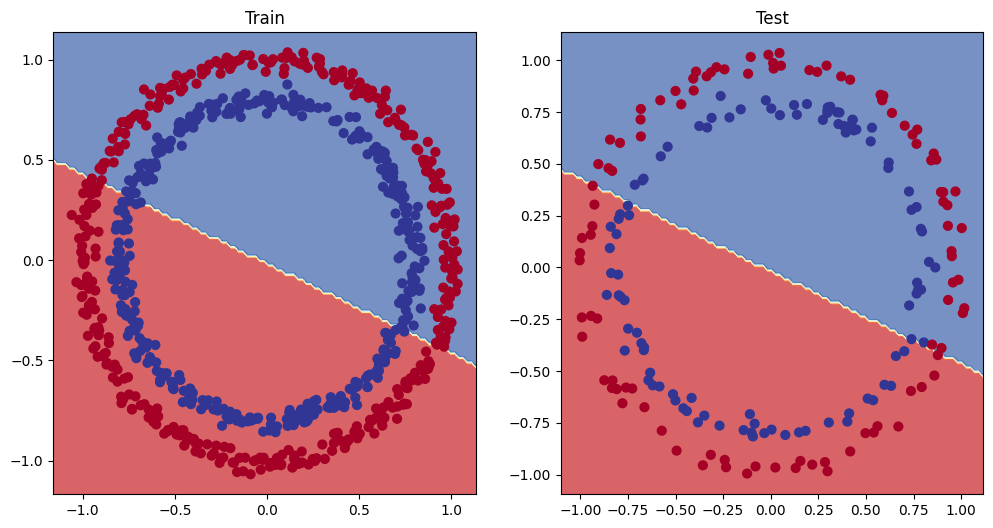

In [78]:
from helper_functions import plot_predictions, plot_decision_boundary

# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

We can see that our models accuracy is 50% on average. In a binary classification filled with equal classes, a 50% accuracy is the same as random guessing, which is bad

#### 5. Improving Our Model to Increase Accuracy from 50%

To enhance our model's accuracy from 50%, we can consider the following strategies:

- **Add more layers** to allow the model to learn more complex patterns in the data.
- **Increase the number of hidden units/nodes**, i.e., go from 8 to 10 hidden units, to capture more features.
- **Train for more epochs** to give the model more opportunities to learn from the data.
- **Change the activation functions** to explore different ways of introducing non-linearity into the model.
- **Adjust the learning rate** to find the optimal step size for the optimization process.

By implementing these changes, we aim to improve the model's ability to generalize and make more accurate predictions.

![picture](https://github.com/BMugo84/pytorch_in_25_hours/blob/main/improving_the_model.png?raw=True)



In [79]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer(x)
        # z = self.layer(z)
        # z = self.layer(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))      # leverages speedups

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [80]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()
# optimizer function
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001)

In [81]:
# Writing a training and evaluation loops for model_1

# set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put the data into a target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# for an epoch in a range:
for epoch in range(epochs):
    ### Training
    model_1.train()

    # do the forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate the loss/accuracy
    loss = loss_fn(y_logits,    # raw outputs accepted by BCElogitswithloss
                   y_train)     # targets/labels
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # optimize the zero grad
    optimizer.zero_grad()

    #     loss backward
    loss.backward()
    # optimizer step, step
    optimizer.step()

    ###testing
    model_1.eval()
    with torch.inference_mode():
        # do the forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate the loss
        test_loss = loss_fn(test_logits, # raw outputs accepted by BCElogitswithloss
                       y_test)      # targets/labels
        test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

    # print out whats happenin'
    if epoch%100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f}%   |   Test loss: {test_loss:.5f}, Test acc: {test_acc:2f}")

Epoch: 0, Loss: 0.69396, Acc: 50.88%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 100, Loss: 0.69395, Acc: 50.88%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 200, Loss: 0.69395, Acc: 50.75%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 300, Loss: 0.69394, Acc: 50.75%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 400, Loss: 0.69394, Acc: 50.75%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 500, Loss: 0.69394, Acc: 50.75%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 600, Loss: 0.69394, Acc: 50.75%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 700, Loss: 0.69393, Acc: 50.75%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 800, Loss: 0.69393, Acc: 50.62%   |   Test loss: 0.69261, Test acc: 51.000000
Epoch: 900, Loss: 0.69393, Acc: 50.62%   |   Test loss: 0.69261, Test acc: 51.000000


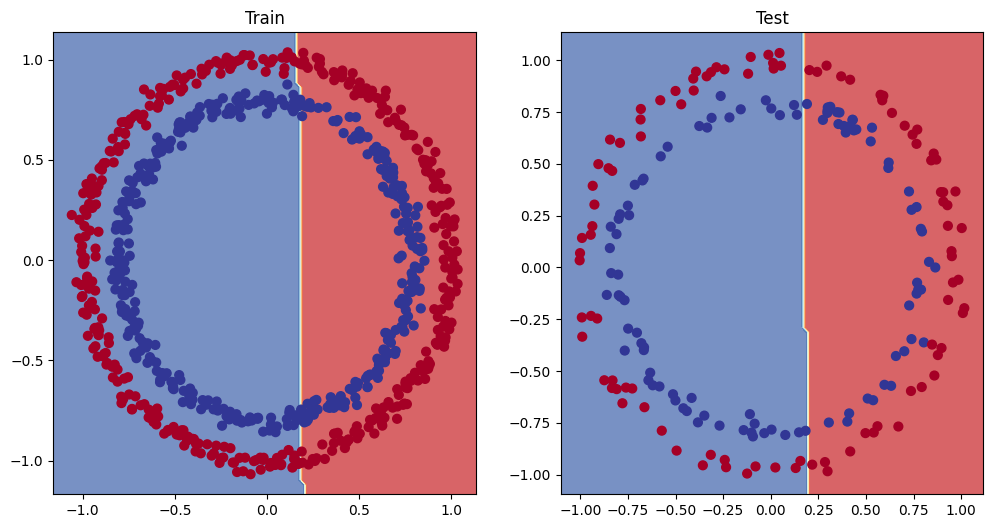

In [82]:
# plot the decision boundary
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

so, we tried changing the layers, adding more hidden units and fittin for longer but the accuracy still stayed the same.

## 7. Prepearing data to see whether our model can fit a straight line

### 7.1 Testing out on a smaller problem

In [83]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01


# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check data
print(X_regression[:10], y_regression[:10])

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


In [84]:
# create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

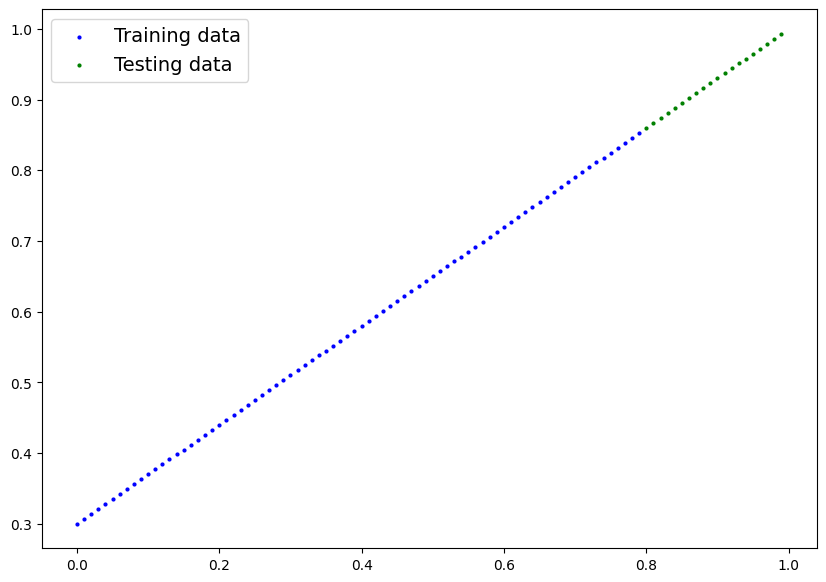

In [85]:
plot_predictions(
    train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression,
    predictions=None
)

In [86]:
# use nn.sequential to make some model changes
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [87]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.0001)

In [88]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put the data into a target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


# for an epoch in a range:
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    # print out whats happenin'
    if epoch%100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0, Loss: 0.75986, Test loss: 0.95353
Epoch: 100, Loss: 0.72217, Test loss: 0.91073
Epoch: 200, Loss: 0.68506, Test loss: 0.86850
Epoch: 300, Loss: 0.64848, Test loss: 0.82678
Epoch: 400, Loss: 0.61238, Test loss: 0.78551
Epoch: 500, Loss: 0.57669, Test loss: 0.74462
Epoch: 600, Loss: 0.54137, Test loss: 0.70406
Epoch: 700, Loss: 0.50636, Test loss: 0.66376
Epoch: 800, Loss: 0.47162, Test loss: 0.62366
Epoch: 900, Loss: 0.43710, Test loss: 0.58371


We can see our model works as the loss went down significantly. This means that our model, which is based on a linear architecture, works well on a linear dataset.


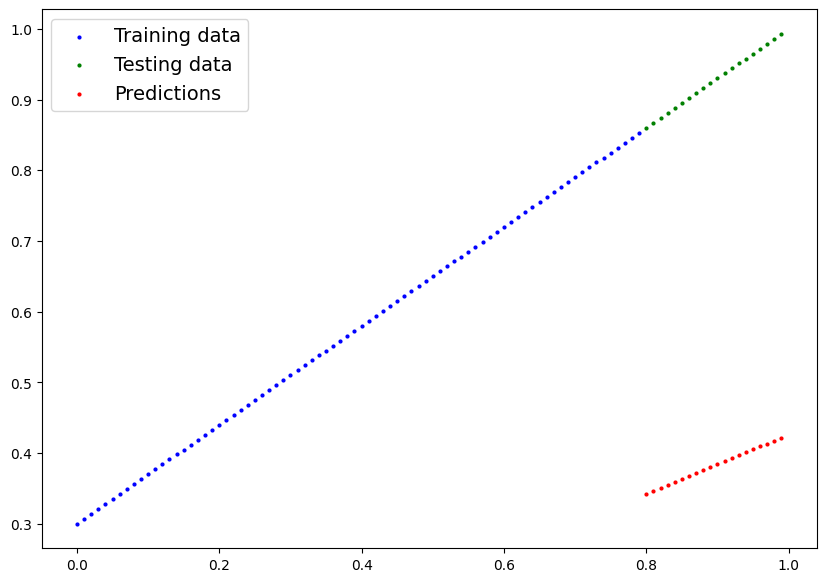

In [89]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(
    train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_test_regression.cpu(),
    predictions=y_preds.cpu()
)

## 8 Non-linearity

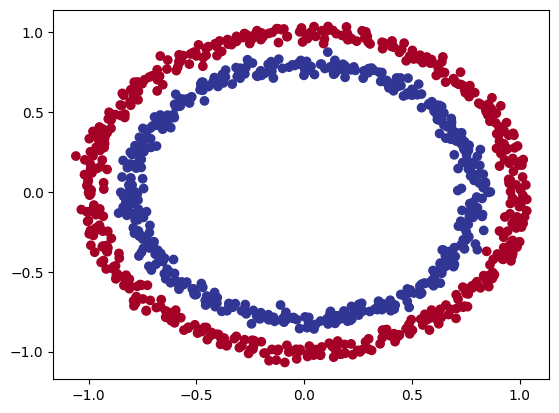

In [90]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [91]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# tturn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 8.2 Building a model with non linearity

Link: https://pytorch.org/docs/stable/nn.html

In [98]:
# build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # apply non-linearity to each layer
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# instantiate our model
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [99]:
# setup loss and optimizer /
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)



In [100]:
# random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# placing all data into target device
X_train, y_train = X_train.to(device) ,y_train.to(device)
X_test, y_test = X_test.to(device) ,y_test.to(device)

# Training loop
epochs = 1000

for epoch in range(epochs):
    # Train
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.no_grad():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0, Loss: 0.69753, Acc: 50.00% | Test loss: 0.69784, Test acc: 50.00%
Epoch: 100, Loss: 0.68987, Acc: 56.25% | Test loss: 0.69139, Test acc: 51.50%
Epoch: 200, Loss: 0.68663, Acc: 52.88% | Test loss: 0.68875, Test acc: 52.00%
Epoch: 300, Loss: 0.68264, Acc: 53.62% | Test loss: 0.68576, Test acc: 52.50%
Epoch: 400, Loss: 0.67735, Acc: 54.00% | Test loss: 0.68189, Test acc: 53.50%
Epoch: 500, Loss: 0.67006, Acc: 56.00% | Test loss: 0.67640, Test acc: 55.50%
Epoch: 600, Loss: 0.65938, Acc: 62.38% | Test loss: 0.66777, Test acc: 58.00%
Epoch: 700, Loss: 0.64168, Acc: 75.50% | Test loss: 0.65325, Test acc: 68.50%
Epoch: 800, Loss: 0.61284, Acc: 87.38% | Test loss: 0.62886, Test acc: 85.00%
Epoch: 900, Loss: 0.56398, Acc: 97.25% | Test loss: 0.58723, Test acc: 93.00%


In [101]:
# evaluating the model
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

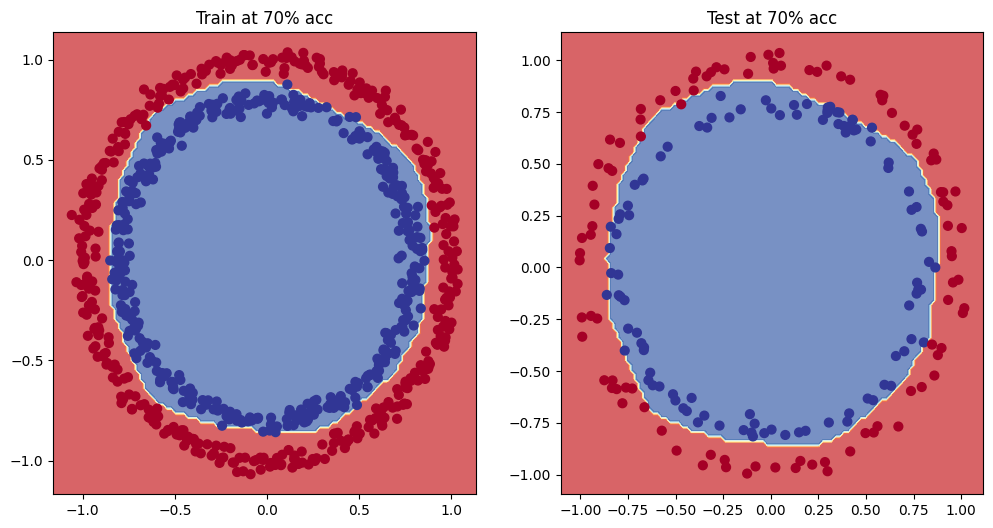

In [102]:
# plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train at 70% acc")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test at 70% acc")
plot_decision_boundary(model_3, X_test, y_test)

#### binary classification problems in real life



##### 1. **Credit Card Fraud Detection:**
   - **Objective:** Identify whether a given transaction is fraudulent or not.
   - **Classes:** Fraud (1) or Not Fraud (0).

##### 2. **Spam Email Detection:**
   - **Objective:** Classify emails as either spam or not spam.
   - **Classes:** Spam (1) or Not Spam (0).

##### 3. **Medical Diagnosis:**
   - **Objective:** Determine whether a patient has a particular disease based on their medical data.
   - **Classes:** Disease Present (1) or Disease Absent (0).

##### 4. **Churn Prediction:**
   - **Objective:** Predict whether a customer will leave (churn) or stay with a service.
   - **Classes:** Churn (1) or Not Churn (0).

##### 5. **Loan Default Prediction:**
   - **Objective:** Predict whether a borrower will default on a loan.
   - **Classes:** Default (1) or No Default (0).

##### 6. **Insurance Claim Fraud Detection:**
   - **Objective:** Identify whether an insurance claim is fraudulent.
   - **Classes:** Fraudulent Claim (1) or Legitimate Claim (0).

##### 7. **Employee Attrition:**
   - **Objective:** Predict whether an employee will leave the company.
   - **Classes:** Leave (1) or Stay (0).

##### 8. **Heart Disease Prediction:**
   - **Objective:** Predict the presence of heart disease based on patient data.
   - **Classes:** Disease (1) or No Disease (0).

##### 9. **Customer Satisfaction:**
   - **Objective:** Predict whether a customer is satisfied or not based on feedback and interaction data.
   - **Classes:** Satisfied (1) or Not Satisfied (0).

##### 10. **Click-Through Rate Prediction:**
   - **Objective:** Predict whether a user will click on an advertisement or not.
   - **Classes:** Click (1) or No Click (0).

##### Example Scenario: Credit Card Fraud Detection

In this example, the model takes features such as transaction amount, location, time, etc., and predicts whether a transaction is fraudulent or not.

##### Example Scenario: Insurance Claim Fraud Detection

In this example, the model uses features like claim amount, claimant's history, and other relevant data to predict whether an insurance claim is fraudulent.

These binary classification problems are critical in various industries, and machine learning models can significantly improve decision-making processes by accurately identifying the two classes.